# K-Nearest Neighbor Algorithm
------
In statistics, the k-nearest neighbors algorithm (k-NN) is a non-parametric machine learning method。 It is used for classification and regression. In both cases, the input consists of the k closest training examples in feature space. The output depends on whether k-NN is used for classification or regression:
- In k-NN classification, the output is a class membership. An object is classified by a plurality vote of its neighbors, with the object being assigned to the class most common among its k nearest neighbors (k is a positive integer, typically small). If k = 1, then the object is simply assigned to the class of that single nearest neighbor.
- In k-NN regression, the output is the property value for the object. This value is the average of the values of k nearest neighbors.


-----
k-NN is a type of instance-based learning, or lazy learning, where the function is only approximated locally and all computation is deferred until function evaluation. Since this algorithm relies on distance for classification, if the features represent different physical units or come in vastly different scales then normalizing the training data can improve its accuracy dramatically.

In [62]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split


In [63]:
data = pd.read_csv('column_2C_weka.csv')
data.head()

,pelvic_incidence,pelvic_tilt numeric,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class
0,63.027817,22.552586,39.609117,40.475232,98.672917,-0.254400,Abnormal
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,Abnormal
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,Abnormal
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,Abnormal
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,Abnormal


# Visualization

In [64]:
A = data[data["class"] == "Abnormal"]
N = data[data["class"] == "Normal"]


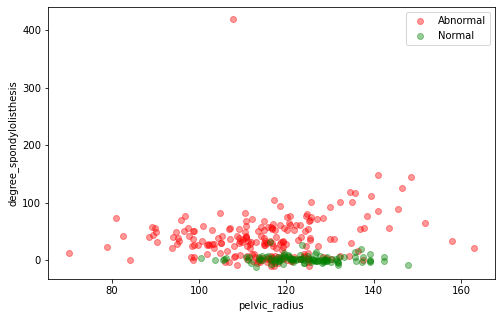

In [65]:
plt.figure(figsize=(8,5))
plt.scatter(A.pelvic_radius,A.degree_spondylolisthesis,label= "Abnormal", color="red", alpha=0.4 )
plt.scatter(N.pelvic_radius,N.degree_spondylolisthesis, label = "Normal", color="green", alpha=0.4)
plt.xlabel("pelvic_radius")
plt.ylabel("degree_spondylolisthesis")
plt.legend()
plt.show()

# String to integer

In [66]:
# Abnormal to 0
# Normal to 1
data["class"] = [1 if each == "Abnormal" else 0 for each in data["class"]]
y = data["class"].values

In [67]:
x_data = data.drop(["class"], axis= 1)
x_data.head()

,pelvic_incidence,pelvic_tilt numeric,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis
0,63.027817,22.552586,39.609117,40.475232,98.672917,-0.254400
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501


# Normalization

In [68]:
x = (x_data - np.min(x_data))/(np.max(x_data)-np.min(x_data))

In [69]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.3,random_state=1)

# KNN Model

In [70]:
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(x_train,y_train)
prediction = knn.predict(x_test)
print(" {} nn score: {} ".format(3,knn.score(x_test,y_test)))

 3 nn score: 0.7526881720430108 


# Find best K value

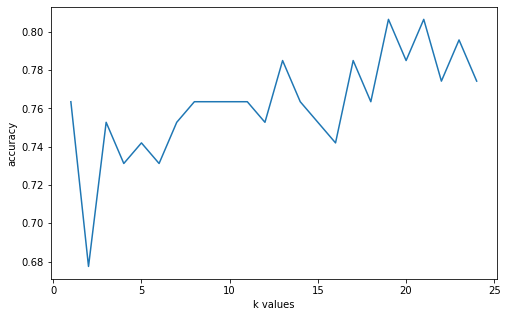

In [71]:
score_list = []
for each in range(1,25):
    knn2 = KNeighborsClassifier(n_neighbors = each)
    knn2.fit(x_train,y_train)
    score_list.append(knn2.score(x_test,y_test))
plt.figure(figsize=(8,5))    
plt.plot(range(1,25),score_list)
plt.xlabel("k values")
plt.ylabel("accuracy")
plt.show()

In [72]:
knn = KNeighborsClassifier(n_neighbors = 19)
knn.fit(x_train,y_train)
prediction = knn.predict(x_test)
print(" {} nn score: {} ".format(19,knn.score(x_test,y_test)))

 19 nn score: 0.8064516129032258 


# Conclusion
----
The best K value is 19 and its accuracy is about 80% 